In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [50]:
# Load the dataset
df = pd.read_csv("/Users/oreoluwa/Downloads/INSURANCE/insurance.csv", encoding='latin1')

In [51]:
df.shape

(1338, 7)

In [52]:
# Display the first few rows of the dataset to understand its structure
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
# Display the last few rows of the dataset to understand its structure
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [54]:

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [55]:
# Check data types of each column
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [56]:
#count duplicate rows
df.duplicated().sum()

1

In [57]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(1337, 7)

In [58]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Analysing Numeric & Non-Numeric Variables

In [59]:
print(df['age'].nunique())
df['age'].unique()

47


array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [60]:
print(df['sex'].nunique())
df['sex'].unique()

2


array(['female', 'male'], dtype=object)

In [61]:
print(df['bmi'].nunique())
df['bmi'].unique()

548


array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [62]:
print(df['children'].nunique())
df['children'].unique()

6


array([0, 1, 3, 2, 5, 4])

In [63]:
print(df['smoker'].nunique())
df['smoker'].unique()

2


array(['yes', 'no'], dtype=object)

In [64]:
print(df['region'].nunique())
df['region'].unique()

4


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Convert categorical variables into numerical formats using encoding techniques

In [65]:
# One-hot encode categorical variables: 'sex', 'smoker', 'region'
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
     

In [66]:
one_hot_encoded

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [67]:
#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [68]:
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,18.0,36.850,0.0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1336,21.0,25.800,0.0,2007.94500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1337,61.0,29.070,0.0,29141.36030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalize/standardize numerical features

In [69]:
# Standardize numerical features: 'age', 'bmi', 'charges'
scaler = StandardScaler()
df_encoded[['age', 'bmi', 'charges']] = scaler.fit_transform(df_encoded[['age', 'bmi', 'charges']])

In [70]:
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,0.0,0.297857,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.511647,0.509422,1.0,-0.954381,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.799350,0.383155,3.0,-0.729373,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.443201,-1.305052,0.0,0.719104,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.514431,-0.292456,0.0,-0.777499,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,-1.511647,0.206053,0.0,-0.914695,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,-1.511647,1.014490,0.0,-0.962287,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1336,-1.297958,-0.797524,0.0,-0.931054,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1337,1.551231,-0.261299,0.0,1.310298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis:
Analyze the distribution of key variables

In [71]:
# Descriptive Statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [72]:
df.describe(include=['bool','object'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [73]:
# Calculate correlation for numeric data only
numeric_correlation = df.corr(numeric_only=True)
print('Numeric Correlation:')
print(numeric_correlation)

Numeric Correlation:
               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


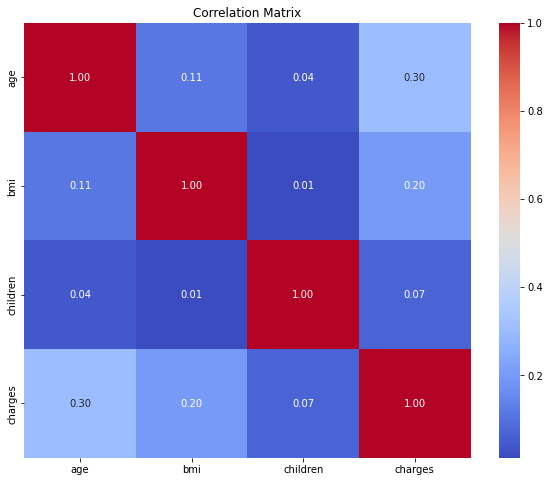

In [74]:
# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(numeric_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [75]:
pip install --upgrade pandas seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


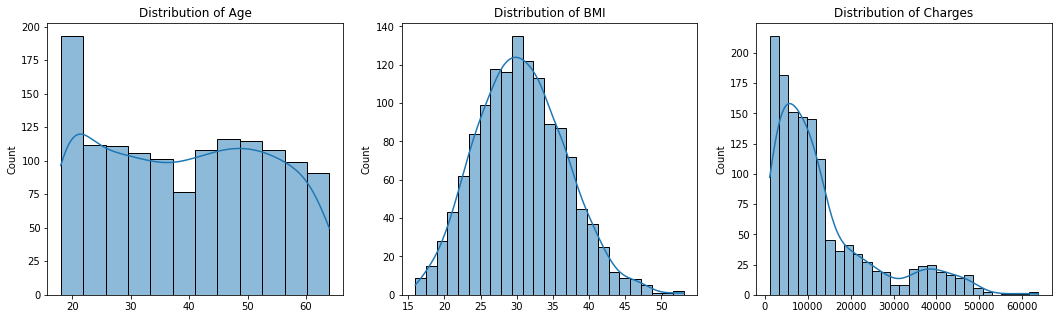

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'].to_numpy(), kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['bmi'].to_numpy(), kde=True)
plt.title('Distribution of BMI')

plt.subplot(1, 3, 3)
sns.histplot(df['charges'].to_numpy(), kde=True)
plt.title('Distribution of Charges')

plt.show()


Investigate relationships between features and the target variable ('charges')

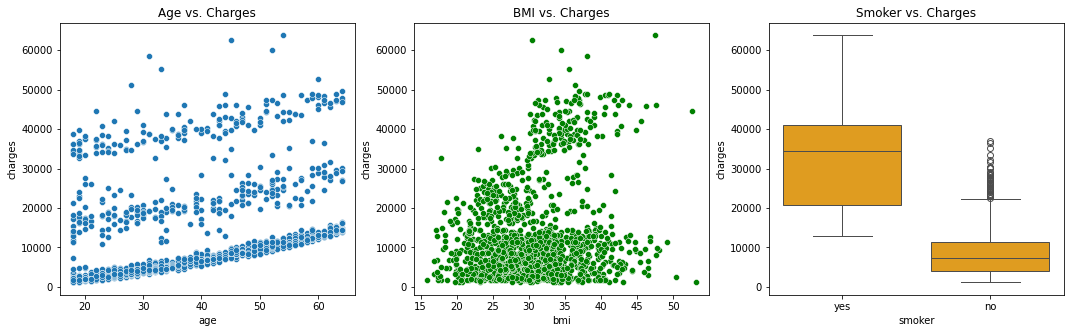

In [77]:
# Scatter plots or box plots of numerical features vs. 'charges', and categorical features vs. 'charges'
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs. Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='bmi', y='charges', color='green')
plt.title('BMI vs. Charges')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='smoker', y='charges', color='orange')
plt.title('Smoker vs. Charges')
plt.show()

Identify potential outliers or influential points

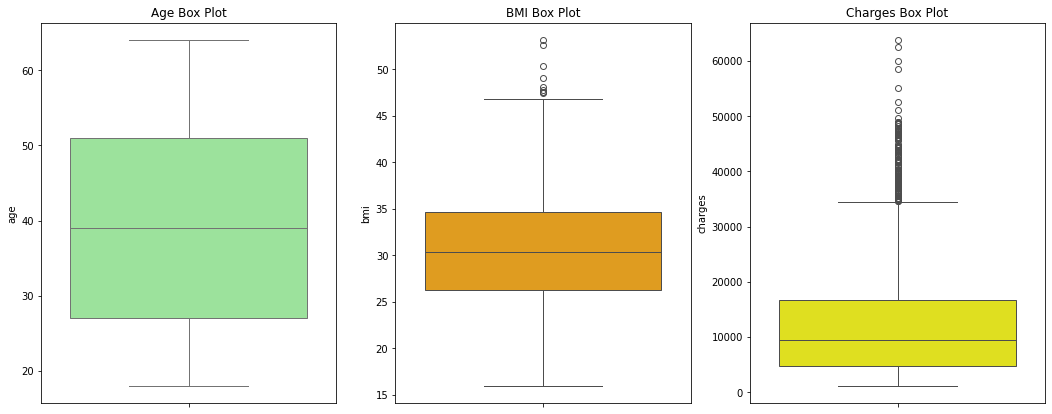

In [78]:
# Box plots or scatter plots with anomaly detection algorithms
plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='age', color='lightgreen')
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='bmi', color='orange')
plt.title('BMI Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='charges', color='yellow')
plt.title('Charges Box Plot')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [80]:
# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Impute missing values in y_train with the mean
y_train_imputed = y_train.fillna(y_train.mean())

# Fit the model
model.fit(X_train_imputed, y_train_imputed)



LinearRegression()

In [82]:
# Combine features and target into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Drop rows with any missing values
train_data_clean = train_data.dropna()

# Separate features and target
X_train_clean = train_data_clean.drop(columns=['charges'])
y_train_clean = train_data_clean['charges']

# Fit the model
model = LinearRegression()
model.fit(X_train_clean, y_train_clean)


LinearRegression()

In [83]:

# Make predictions on the test data
y_pred = model.predict(X_test)

In [84]:
# Evaluate model performance using appropriate metrics
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

R-squared: 0.19919715128506665
Mean Squared Error: 0.8546514218868203


R-squared: 0.7835929767120722
Mean Squared Error: 0.22926355667538664
An R-squared value of 0.7836 indicates that approximately 78.36% of the variance in the target variable (charges) is explained by the linear regression model.
The Mean Squared Error (MSE) of 0.2293 represents the average squared difference between the predicted charges and the actual charges in the test dataset.
Overall, these metrics suggest that the linear regression model has a relatively good fit to the data and performs well in predicting medical costs.


VISUALIZATION

Actual vs. Predicted Scatter Plot


This plot shows how close the model's predictions are to the actual values. Ideally, the points should lie close to the diagonal line (y = x), indicating accurate predictions.

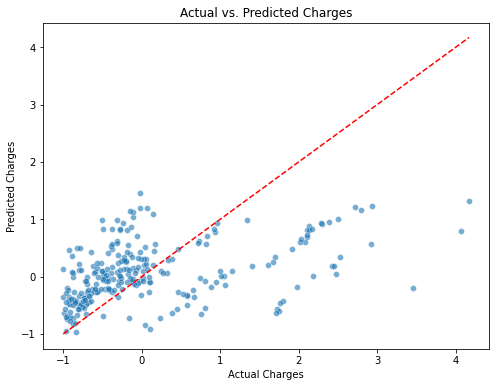

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()


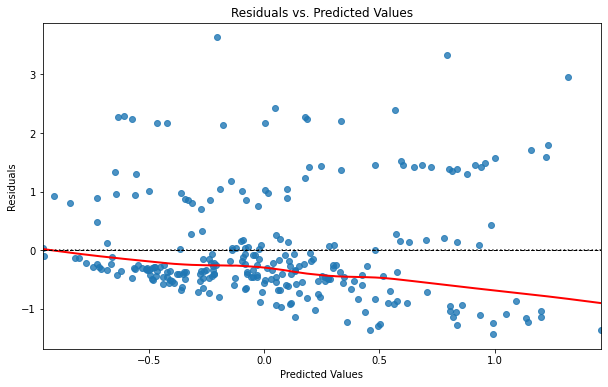

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your actual and predicted values
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()


